In [56]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('C:/Users/hello/Downloads/data/data/benin-malanville.csv')
number_column= df.drop(['Timestamp', 'Comments'], axis=1)

medians= number_column.median()
means=number_column.mean()
stds= number_column.std()

print(f' mean: {means}')
print(f' Median: {medians}')
print(f' Standard deviation: {stds}')

 mean: GHI              240.559452
DNI              167.187516
DHI              115.358961
ModA             236.589496
ModB             228.883576
Tamb              28.179683
RH                54.487969
WS                 2.121113
WSgust             2.809195
WSstdev            0.473390
WD               153.435172
WDstdev            8.582407
BP               994.197199
Cleaning           0.000923
Precipitation      0.001905
TModA             35.246026
TModB             32.471736
dtype: float64
 Median: GHI                1.8
DNI               -0.1
DHI                1.6
ModA               4.5
ModB               4.3
Tamb              28.0
RH                55.1
WS                 1.9
WSgust             2.6
WSstdev            0.5
WD               181.0
WDstdev            8.6
BP               994.0
Cleaning           0.0
Precipitation      0.0
TModA             30.0
TModB             28.9
dtype: float64
 Standard deviation: GHI              331.131327
DNI              261.710501
DHI       

In [2]:
missing_value= df.isnull().sum()
print(missing_value)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [3]:

negative_values = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] < 0
print(negative_values.sum())

GHI       258847
DNI       275987
DHI       259182
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64


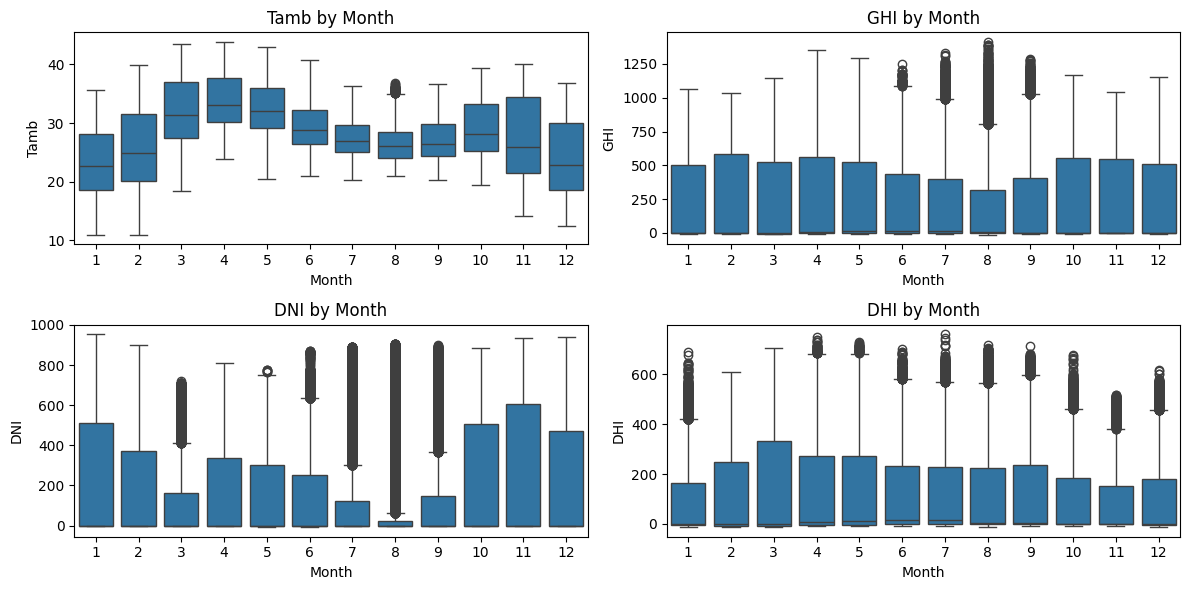

In [57]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Extract month and hour for analysis
df['Month'] = df.index.month
df['Hour'] = df.index.hour

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x='Month', y='Tamb', data=df)
plt.title('Tamb by Month')

plt.subplot(2, 2, 2)
sns.boxplot(x='Month', y='GHI', data=df)
plt.title('GHI by Month')

plt.subplot(2, 2, 3)
sns.boxplot(x='Month', y='DNI', data=df)
plt.title('DNI by Month')

plt.subplot(2, 2, 4)
sns.boxplot(x='Month', y='DHI', data=df)
plt.title('DHI by Month')

plt.tight_layout()
plt.show()

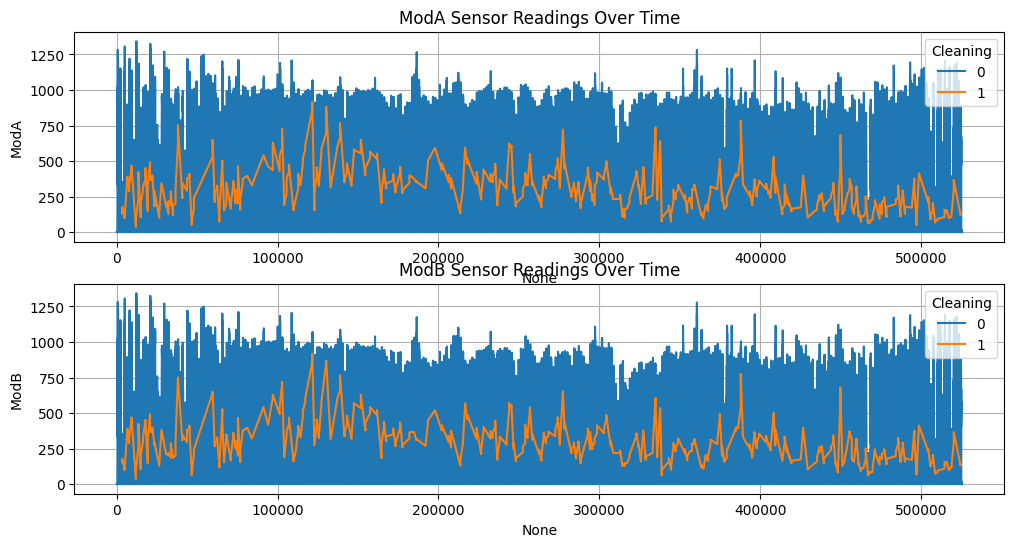

In [4]:

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning')
plt.title('ModA Sensor Readings Over Time')
plt.grid()

plt.subplot(2, 1, 2)
sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning')
plt.title('ModB Sensor Readings Over Time')
plt.grid()
plt.show()

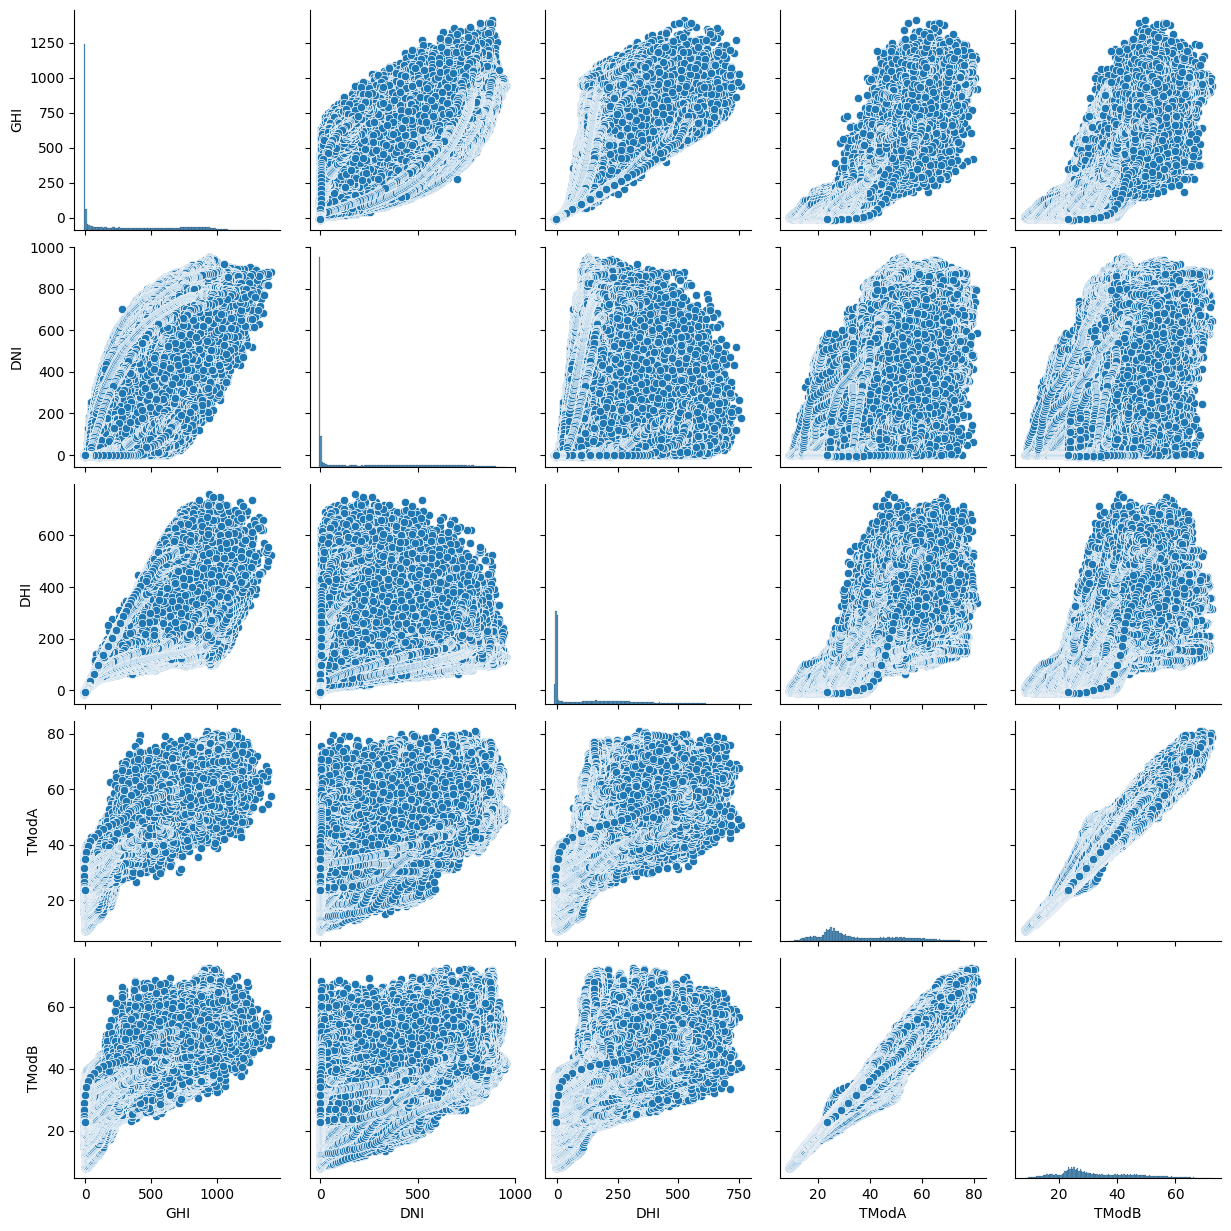

In [10]:
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.show()

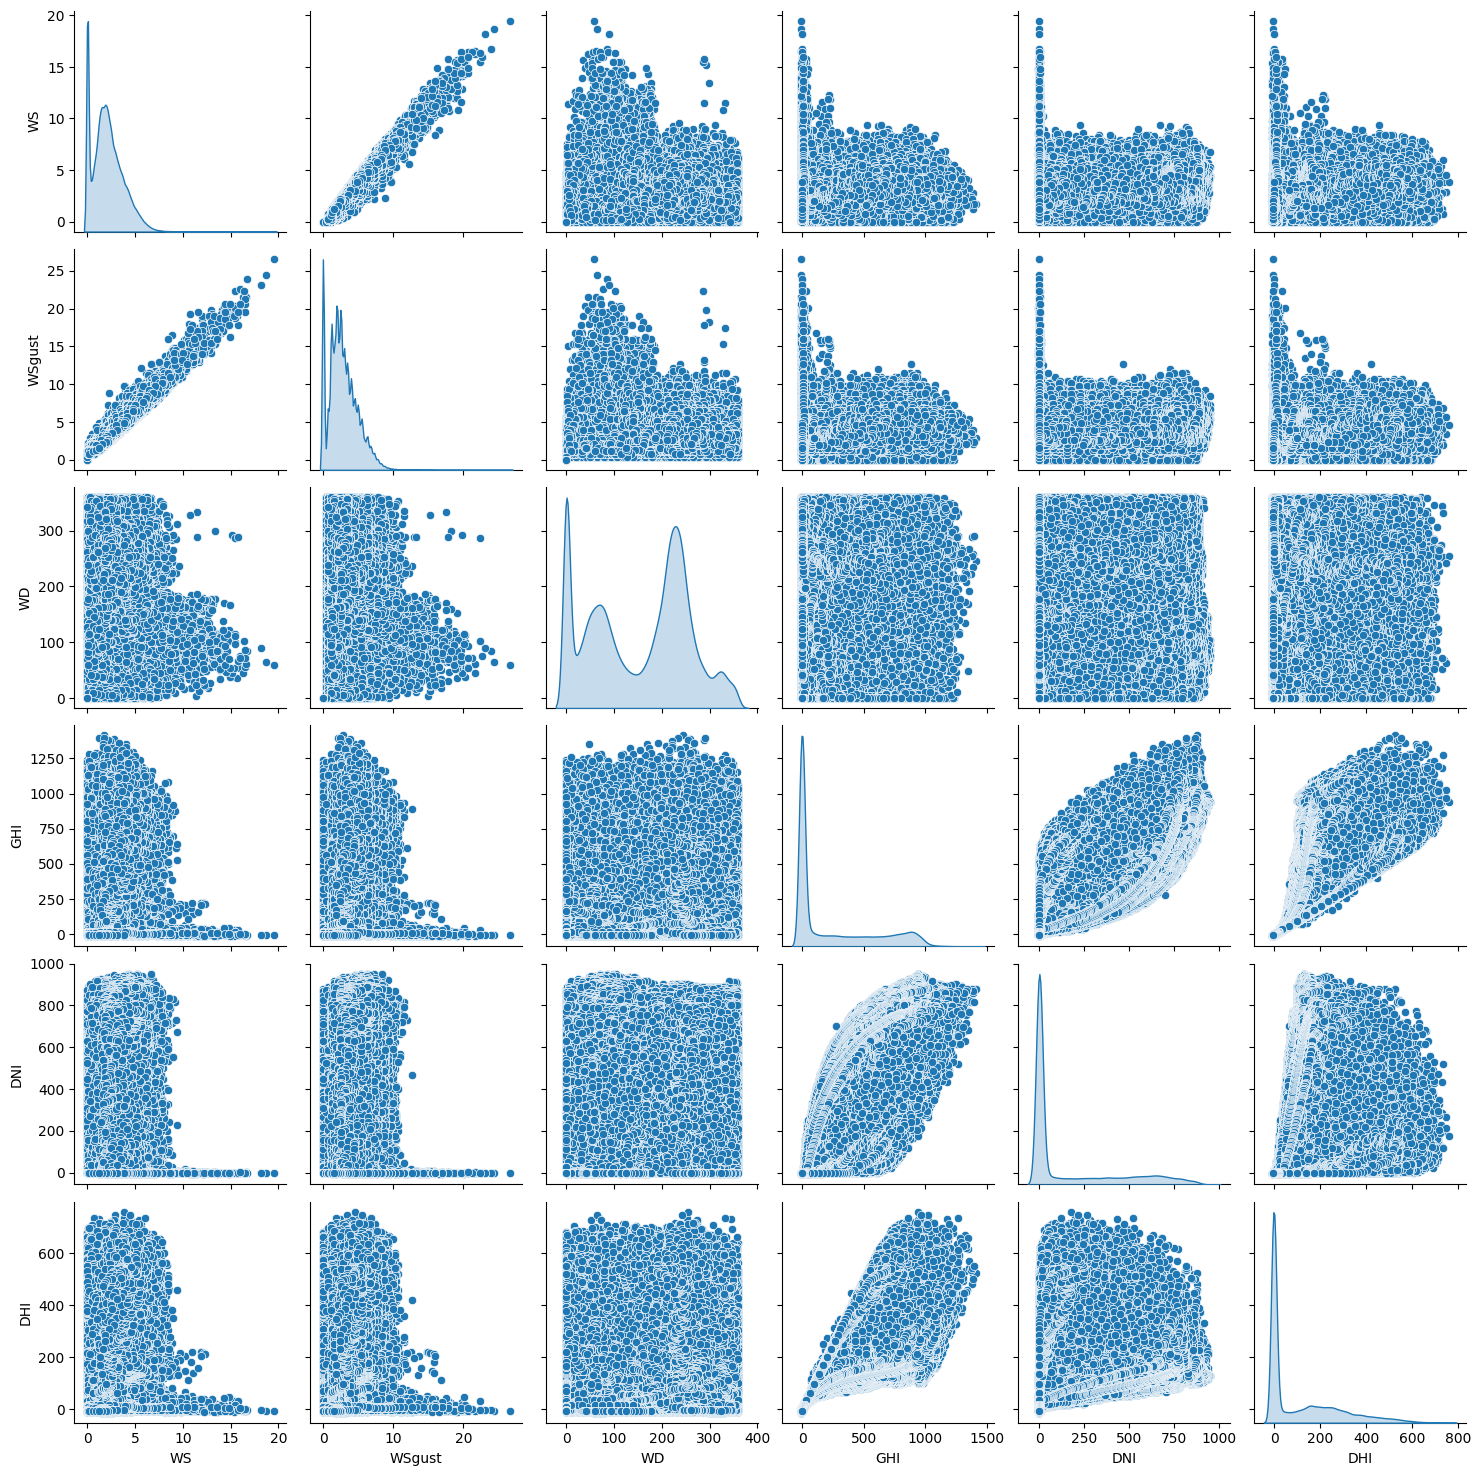

In [7]:
sns.pairplot(df[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']])
plt.show()

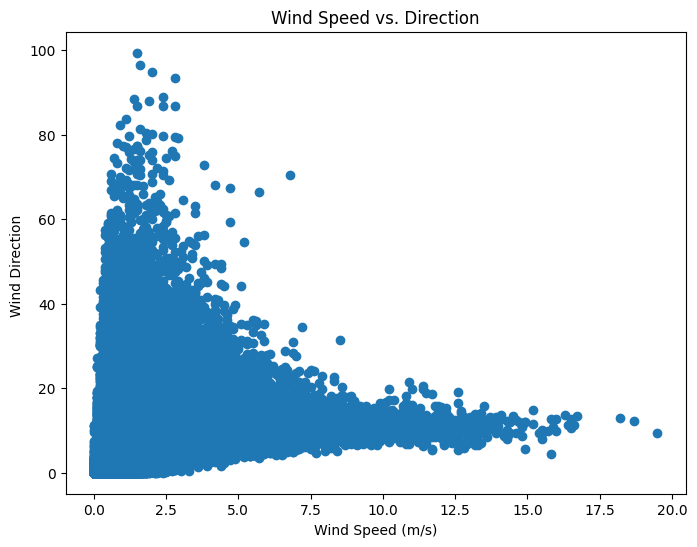

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(df['WS'], df['WDstdev'])
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wind Direction ')
plt.title('Wind Speed vs. Direction')
plt.show()

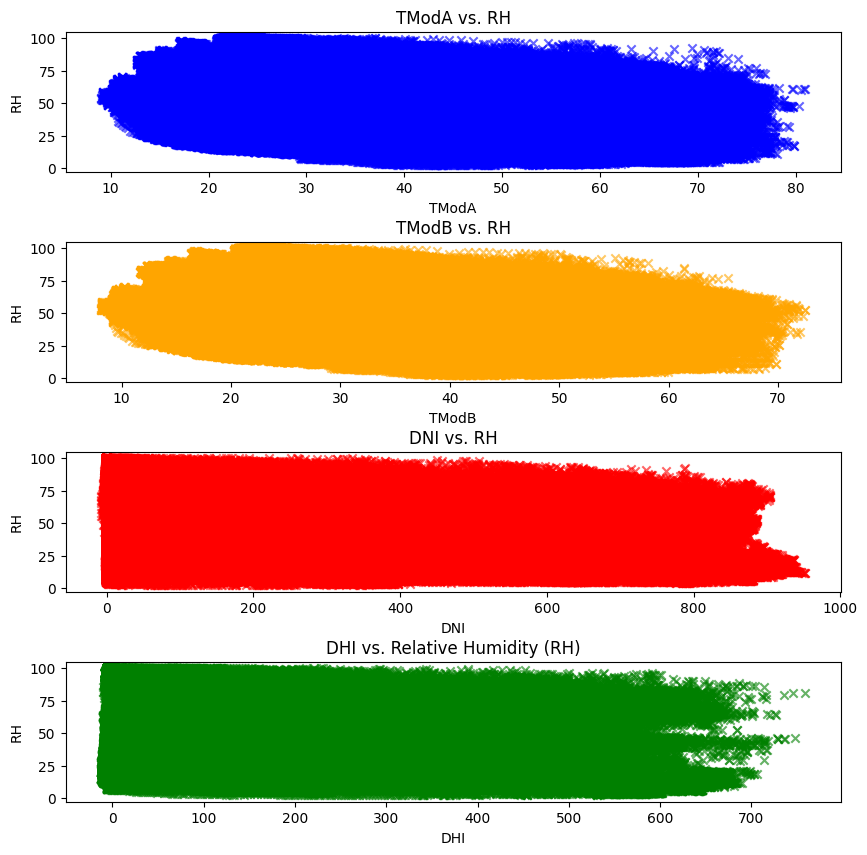

In [15]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

axs[0].scatter(df['TModA'], df['RH'], color='blue', marker='x', alpha=0.6)
axs[0].set_title('TModA vs. RH')
axs[0].set_xlabel('TModA')
axs[0].set_ylabel('RH')


axs[1].scatter(df['TModB'], df['RH'], color='orange', marker='x', alpha=0.6)
axs[1].set_title('TModB vs. RH')
axs[1].set_xlabel('TModB')
axs[1].set_ylabel('RH')

axs[2].scatter(df['DNI'], df['RH'], color='red', marker='x', alpha=0.6)
axs[2].set_title('DNI vs. RH')
axs[2].set_xlabel('DNI')
axs[2].set_ylabel('RH')

axs[3].scatter(df['DHI'], df['RH'], color='green', marker='x', alpha=0.6)
axs[3].set_title('DHI vs. Relative Humidity (RH)')
axs[3].set_xlabel('DHI')
axs[3].set_ylabel('RH')
plt.subplots_adjust(hspace=0.5)
plt.show()

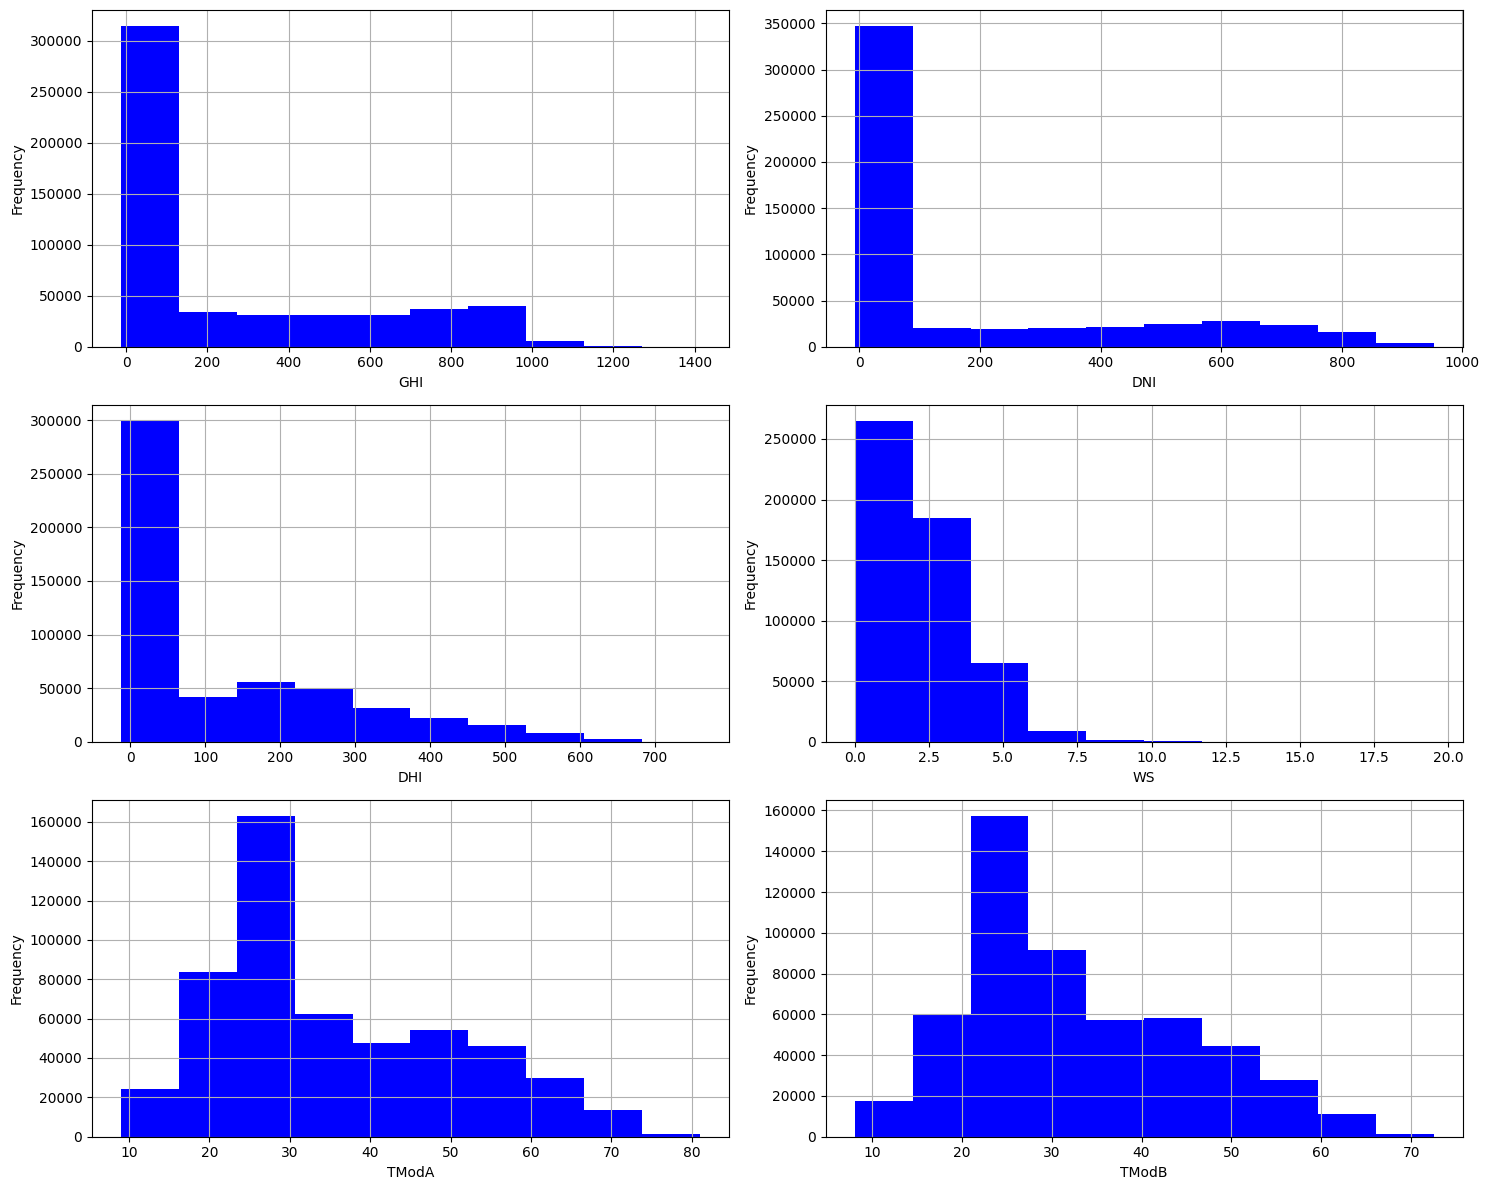

In [59]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']
plt.figure(figsize=(15, 12))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    plt.hist(df[var], color='blue')

    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid()

plt.tight_layout()
plt.show()

In [41]:
variables = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB']
new_df = pd.DataFrame(index=df.index)

for var in variables:
    mean = df[var].mean()
    std = df[var].std()
    new_df[f'Z_{var}'] = (df[var] - mean) / std
    new_df[f'Outlier_{var}'] = np.where(np.abs(new_df[f'Z_{var}']) > 3, True, False)  


result_df = pd.concat([df[variables], new_df], axis=1)


print(result_df[[*variables, *[f'Z_{var}' for var in variables], *[f'Outlier_{var}' for var in variables]]])

        GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  WSstdev  ...  \
0      -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4      0.1  ...   
1      -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0      0.0  ...   
2      -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1      0.5  ...   
3      -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7      0.4  ...   
4      -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7      0.3  ...   
...     ...  ...  ...   ...   ...   ...   ...  ...     ...      ...  ...   
525595 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1      0.5  ...   
525596 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7      0.4  ...   
525597 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1      0.5  ...   
525598 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3      0.5  ...   
525599 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6      0.3  ...   

        Outlier_WS  Outlier_WSgust  Outlier_WSstdev  Outlier_WD  \
0            False  

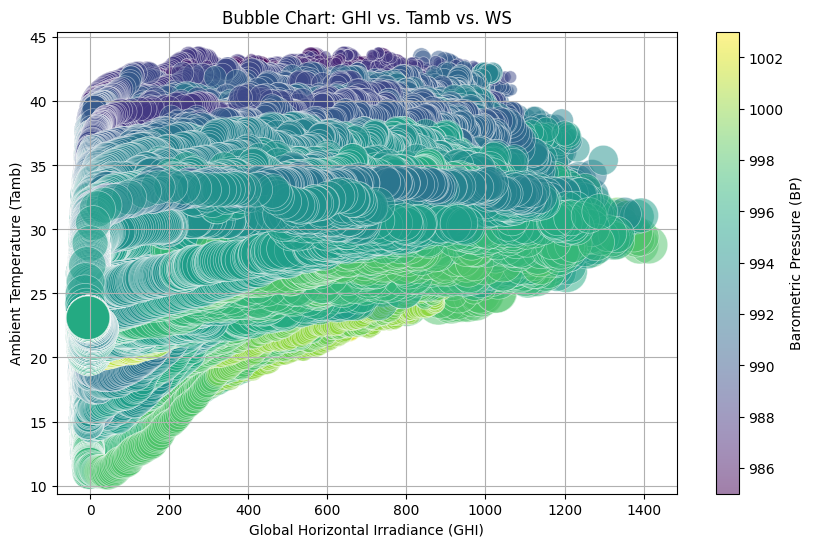

In [27]:
x = df['GHI']  
y = df['Tamb']  
size = df['RH'] * 10  
colors = df['BP']  


plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=size, c=colors, alpha=0.5, cmap='viridis', edgecolors="w", linewidth=0.5)


plt.title('Bubble Chart: GHI vs. Tamb vs. WS')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.colorbar(scatter, label='Barometric Pressure (BP)')
plt.grid()


plt.show()

In [61]:
df= df.drop('Comments', axis=1)
columns_to_replace = ['GHI', 'DNI', 'DHI']

for i in columns_to_replace:
    mean_value = df[i].mean()  
    df[i] = df[i].where(df[i] >= 0, mean_value)
print(df.columns)

Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Month', 'Hour'],
      dtype='object')
